In [5]:
#Importing the necessary modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/workspaces/Codes-Please-/House_Price_Prediction_ML_Project_V2/dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#replacing yes's and no's with 1s and 0s for numeric model training
binary_cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


/tmp/ipykernel_5440/70161697.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [ ]:
#Encoding the Categorical feature manually
df['furnishingstatus_encoded'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})
df.drop('furnishingstatus',axis=1,inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_encoded
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


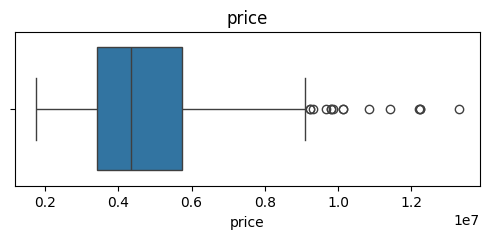

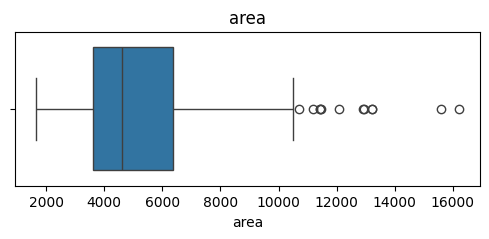

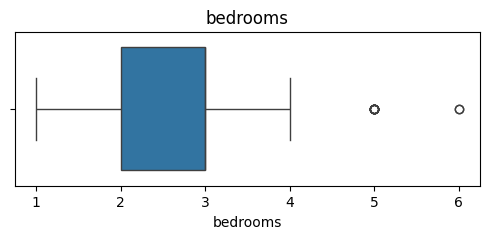

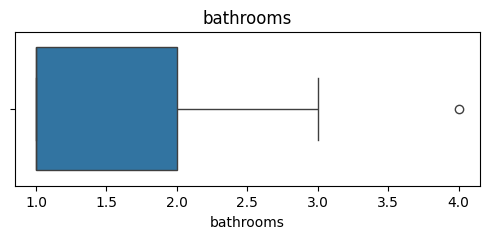

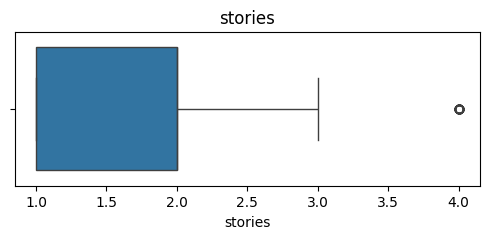

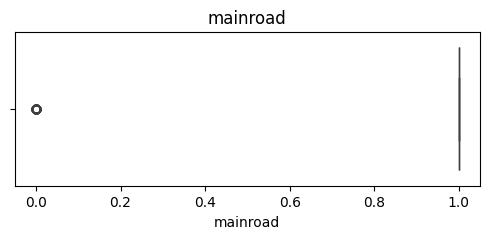

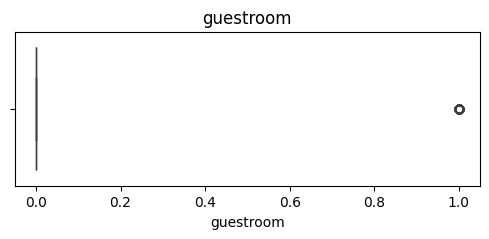

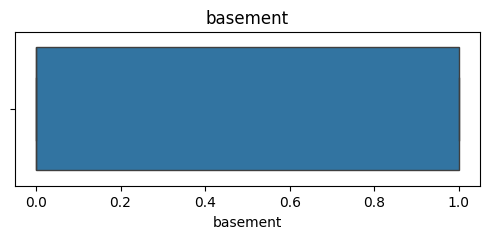

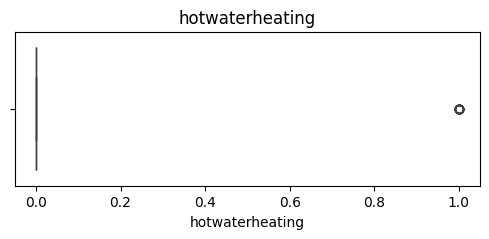

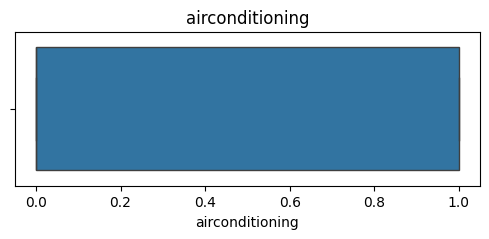

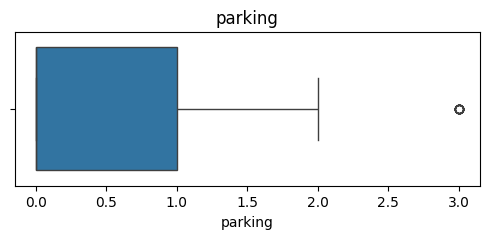

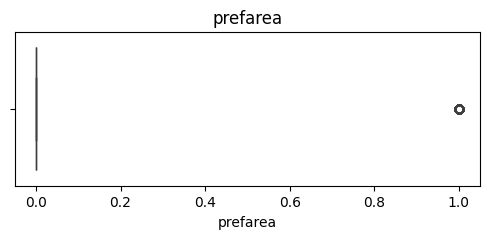

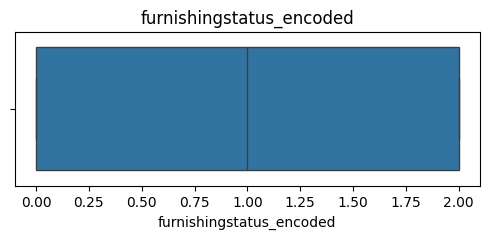

In [ ]:
#Checking for Outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [7]:
#Fixing outliers 
df['area'] = np.log1p(df['area'])
df['price'] = np.log1p(df['price'])  # target variable
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_encoded
0,16.403275,8.912069,4,2,3,1,0,0,0,1,2,1,2
1,16.321037,9.100637,4,4,4,1,0,0,0,1,3,0,2
2,16.321037,9.206433,3,2,2,1,0,1,0,0,2,1,1
3,16.318175,8.922792,4,2,2,1,0,1,0,1,3,1,2
4,16.250001,8.912069,4,1,2,1,1,1,0,1,2,0,2


(<Axes: ylabel='price'>, <Axes: ylabel='price'>)

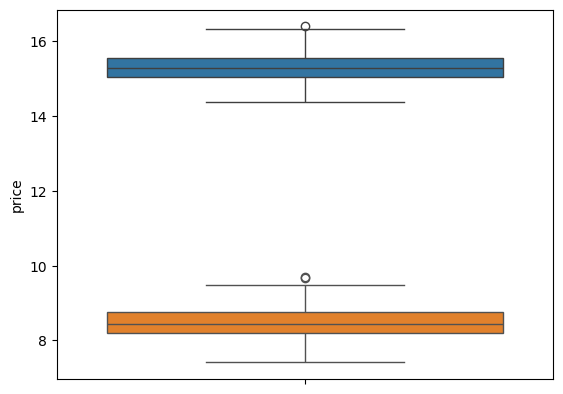

In [8]:
sns.boxplot(df['price']),sns.boxplot(df['area'])

In [14]:
#Assigning input features and target feature
X=df.drop('price',axis=1) #Taking all input features since it was seen that this gives better test results
y=df['price']

Model Training Begins

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_encoded'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #Model is decided based on tests ran on model testing notebook
from sklearn.pipeline import Pipeline
import joblib
numeric_features=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_encoded']
preprocessor=ColumnTransformer(
    transformers=[
        ('numerical_features',StandardScaler(),numeric_features)
    ]
)

model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',Ridge(alpha=10))
])#alpha value decided based on hyperparameter tuning trails from model testing notebook
model_pipeline.fit(X_train,y_train)
joblib.dump(model_pipeline,'model_pipeline.pkl')

['model_pipeline.pkl']

Model Accuracy Testing

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)


y_pred_train = np.expm1(y_pred_train)
y_pred_test = np.expm1(y_pred_test)
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# Evaluation
print("=== Train Performance ===")
print("MAE:", mean_absolute_error(y_train_actual, y_pred_train))
print("R²:", r2_score(y_train_actual, y_pred_train))

print("\n=== Test Performance ===")
print("MAE:", mean_absolute_error(y_test_actual, y_pred_test))
print("R²:", r2_score(y_test_actual, y_pred_test))

=== Train Performance ===
MAE: 677028.6891349874
R²: 0.7035859634693481

=== Test Performance ===
MAE: 987143.7384401988
R²: 0.6499736324394263
